# **추천 시스템**

# **1)추천 시스템**  
- 사용자의 정보 데이터를 분석하여 개인의 취향에 맞는 아이템/컨템츠를 추천하는 알고리즘  

### 1-1)사용되는 데이터의 종류와 특징  
1. 명시적 데이터  
 ex) 평점, 좋아요, 투표, 스케일 점수
 - 고객들에 의해 선호도가 직접적으로 입력된 데이터  
 - 장점: 당시 사용자의 취향을 정확하게 반영    
 - 단점: 데이터 수집 어려움, 변화하는 선호도 반영 어려움  
2. 암시적 데이터  
 ex) 조회수, 영상시청 기간, 구매 기록, 페이지 체류 시간  
 - 고객들의 행동을 기반으로 선호도가 간접적으로 표현된 데이터  
 - 장점: 데이터 수집 쉬움   
 - 단점: 높은 수치가 높은 선호도 의미 X, 직접적인 선호도 알기 어려움  

 ### 1-2)추천시스템 분류  
 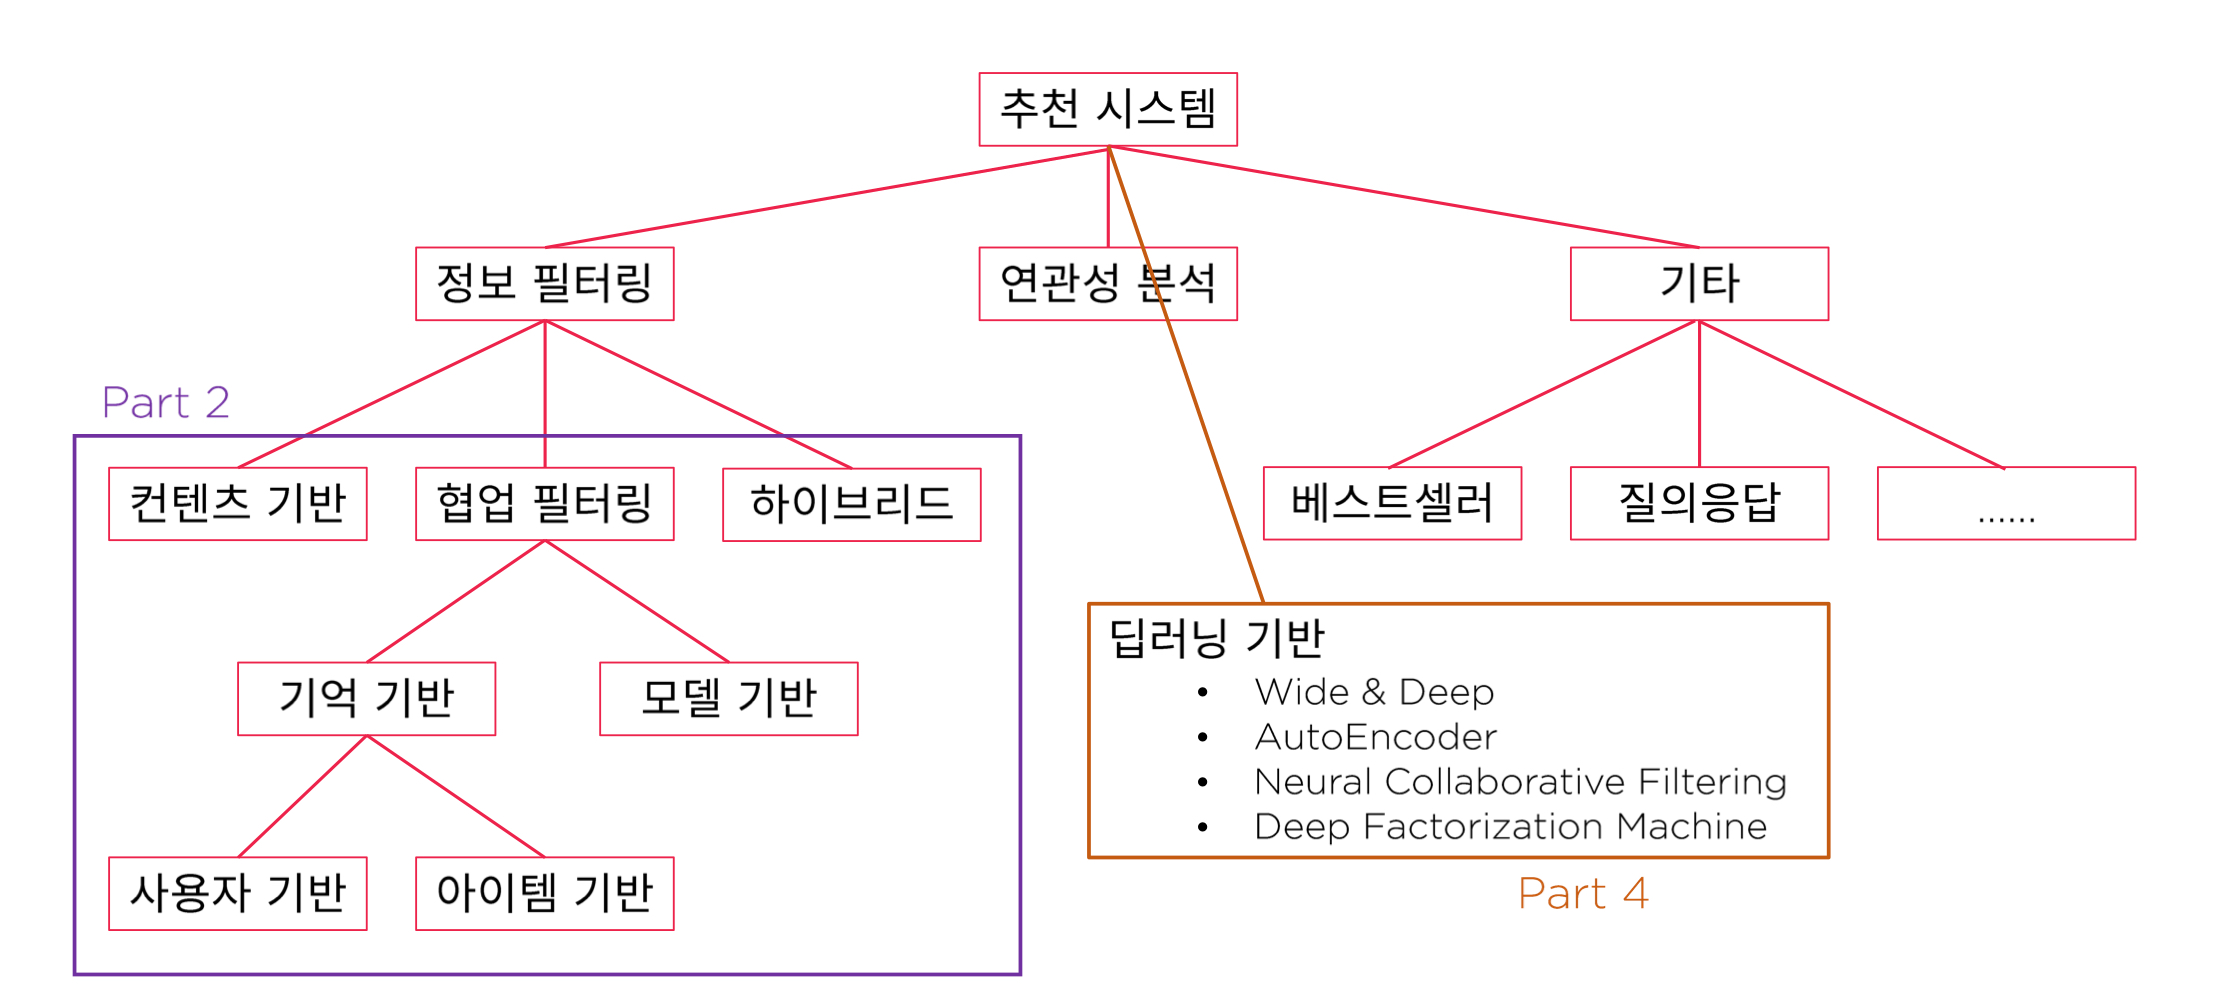  
 1. 내용(콘텐츠) 기반 필터링   
  - 콘텐츠의 **유사도**를 기반으로 사용자 추천  
 2. 협업 필터링  
  - 서비스 내에 있는 다수의 사용자로부터 얻은 선호도 정보를 기반으로 사용자에게 추천하는 방법  
  - 사용자 기반: 특정 사용자와 유사한 취향의 사용자가 선호한 아이템 추천  
  - 아이템 기반: 사용자가 선호한 아이템과 유사한 아이템을 추천  
  - 사용자 기반/아이템 기반 차이점: 사용자 기반 추천은 비슷한 취향을 가진 다른 사용자가 좋아한 아이템을 추천/아이템 기반 추천은 선호하는 아이템을 구매한 다른 사용자들이 자주 구매한 다른 아이템(구매한 아이템과 유사한 아이템)을 추천  
 3. 하이브리드 필터링  
  - 다양한 종류의 추천시스템 알고리즘 조합  
  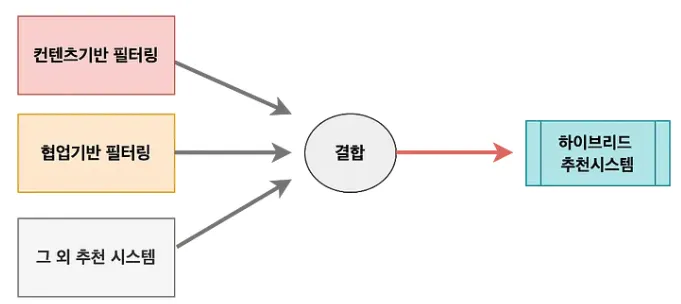  
  - **Weighted Ensemble**: Soft Ensemble(점수) 또는 Hard Vote와 같은 방법으로 여러 모델의 추천 결과를 하나로 함쳐서 최종 추천 아이템을 정하는 방식  
  - **Mixed**: 추천 시스템이 적용될 플랫폼에 (특징이 다른) 여러 추천 알고리즘을 활용하고, 이 때 알고리즘의 추천 결과를 보여주는 방식  
  - **Switch**: 플랫폼 내 사용자 또는 서비스 상태 등 특정 상황을 고려하여 여러 추천 알고리즘의 추천 결과를 선택적으로 보여주는 방식  
  - **Feature Combination**: 보유하고 있는 데이터로부터 얻을 수 있는 다양한 Feautre를 모두 조합하여 추천 알고리즘을 학습하고 추천하는 방식  
  - **Meta-Level**: 여러 추천 알고리즘을 활용할 때 첫번째 모델이 다음 모델의 Input이 되면서 서로가 서로의 정보를 학습하여 추천하는 방식  



# **2)내용 기반 필터링**  
- 사용자 프로필과 아이템 특징과의 일치도를 계산 -> 선호할만한 아이템 추천  
- **컨텐츠 유사도 기반**  
- 사용자 프로필: 사용자가 이전에 좋아했던 항목들의 특징을 모아둔 데이터  
  추천하려는 아이템과 사용자 프로필의 **일치도** 평가  
  -Input : 사용자의 Item들에 대한 등급  
  -Output : 사용자의 등급 매기는 행위에 맞는 classifier를 생성  

### 2-1)유사도  
- 추천시스템을 이해하는데 중요한 수학적 개념  
- 유사도 측정 단계  
  1. 인풋 데이터 만들기  
  - feature 활용 (영화 장르, 제작 국가, 감독, 출연 배우 등)  
  - 테이블 형태로 데이터 정리 (행-아이템, 열-feature)  
  - 숫자로 변환(원-핫 인코딩)  
  2. 유저 정보 활용  
  - 유저 취향 파악 (프로필 정보, 시청 기록 등 활용)  
  - 유저를 n개의 feature로 표현  
  3. 벡터의 내적과 유사성  
  - **벡터**: n개의 feature로 만들어진 데이터 → n차원의 벡터로 표현 가능  
  - **벡터 내적**: 두 벡터의 동일 위치 값들끼리 곱한 후 모두 더한 값  
  - **유사성(similarity)**: 내적 값이 클수록 두 벡터의 유사성 높음  
- 유사도 측정 방식  
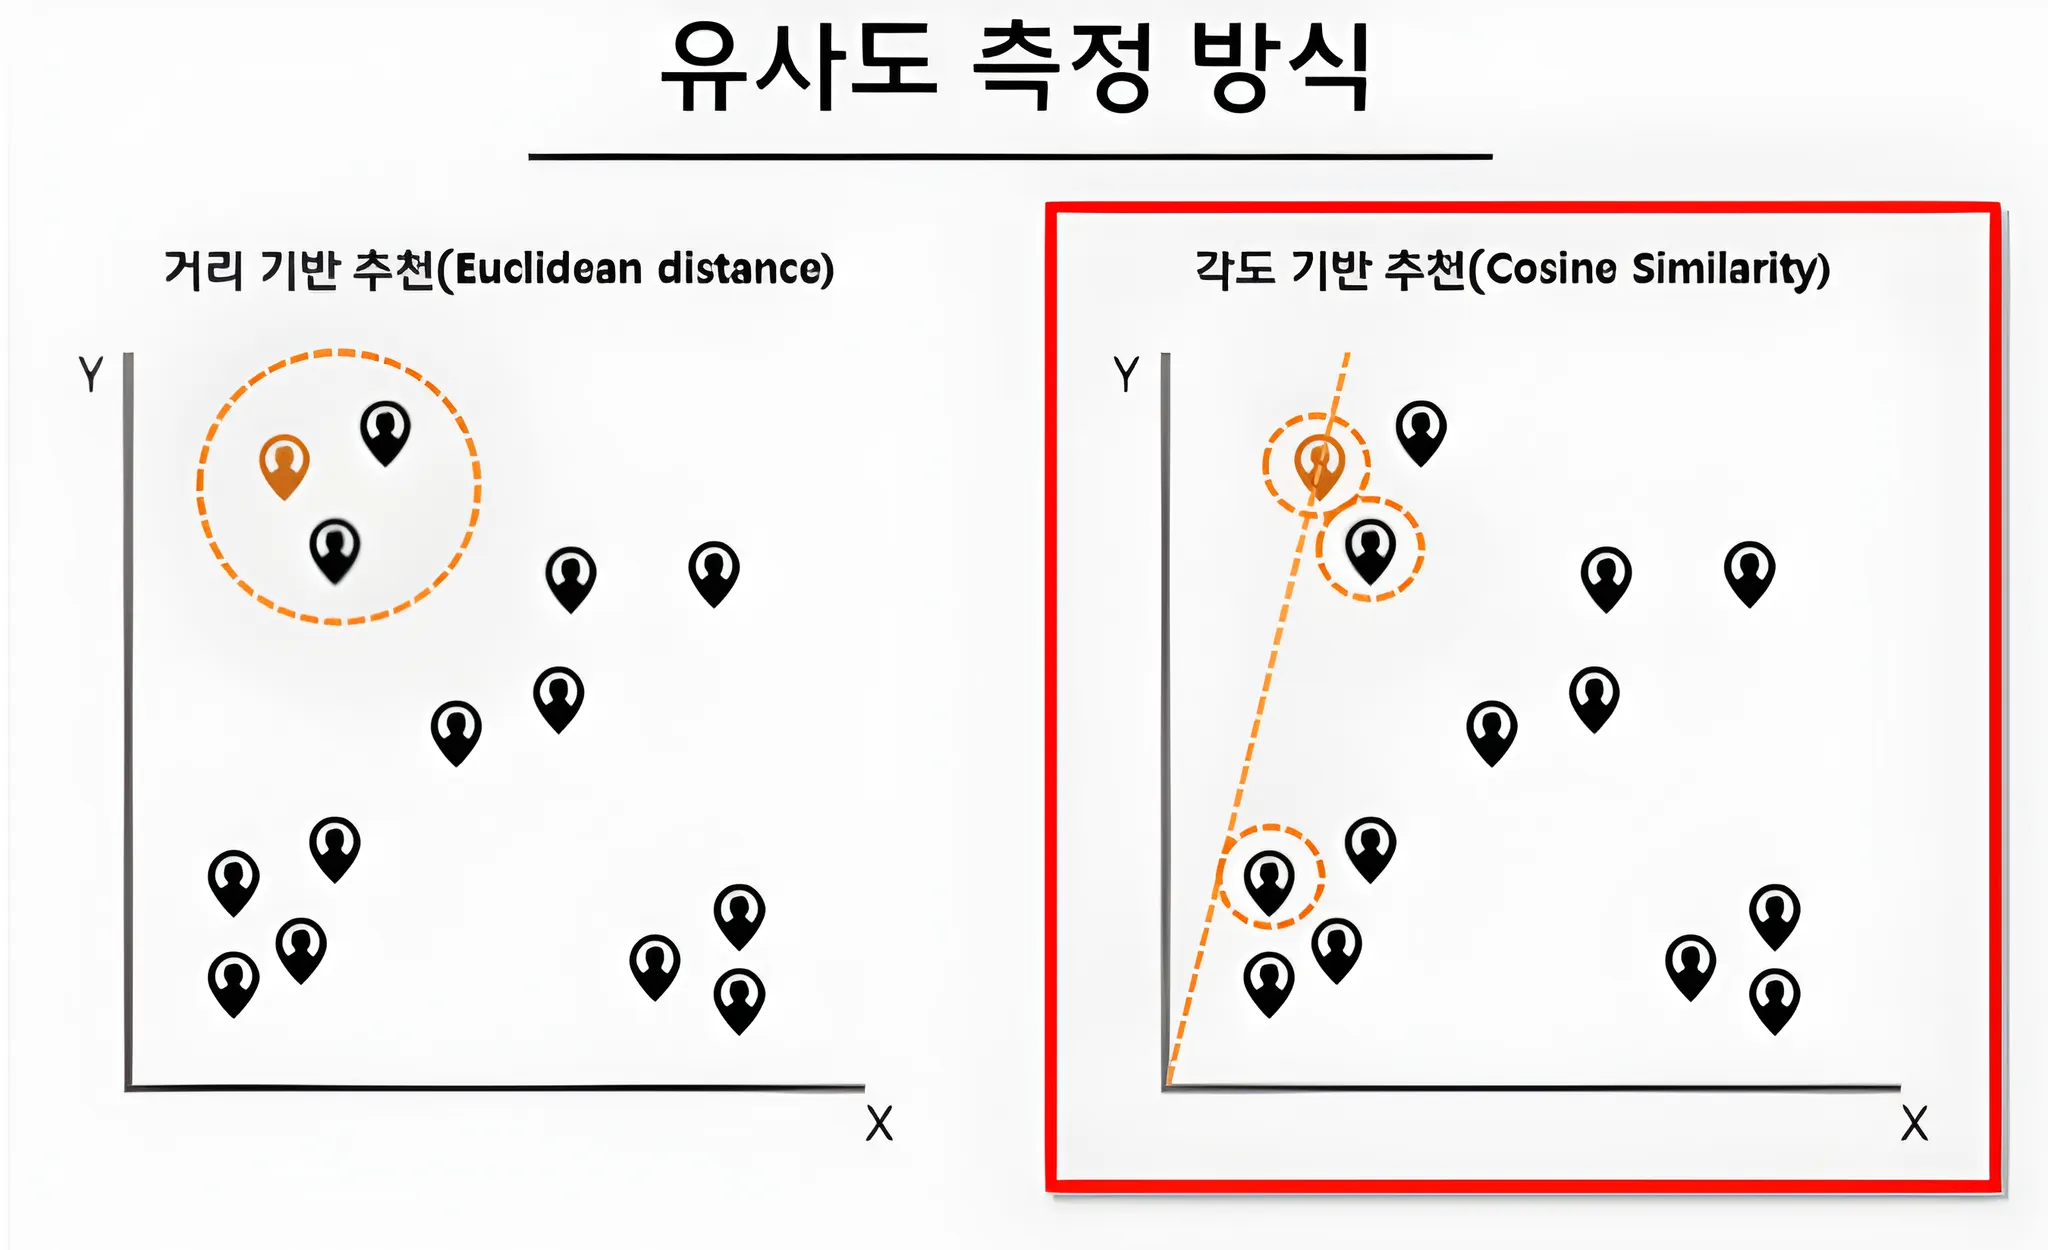  
  - 코사인 유사도(Cosine Similarity): 두 점 사이의 각도를 측정한 지표, 값이 작음 -> 유사도 큼  
  - 유클리드 거리(Euclidean Distance): 두 점 사이의 거리를 측정한 지표, 값이 작음 -> 유사도 큼  

### 2-2)사용자 프로필  
- **직접 지정형**: 사용자에게 자신이 선호하는 아이템의 특징을 명시적으로 지정하도록 하는 방법  
- **간접 지정형**: 사용자의 과거 행동 이력에 기반하여 사용자의 프로필을 작성하는 방법  
- 사용자 프로필 획득 방식  
  1. 특성 가중치 = 사용자가 가지고 있는 아이템 특성 가중치의 평균  
  2. 사용자의 기호 파악, 설문조사나 자발적 키워드 입력 등으로 프로필 획득  
  3. 아이템에 대한 유저의 기존 평가를 바탕으로 분류(Classification)  

### 2-3)아이템 특징  
- TF-IDF  
다른 문서에서는 등장하지 않지만 특정 문서에서만 자주 등장하는 단어"를 찾아서 
문서 내 단어의 가중치를 계산하는 방법  
 -TF: 특정 문서 내에 특정 단어가 얼마나 자주 등장하는 지를 의미  
 -IDF: 전체 문서에서 특정 단어가 얼마나 자주 등장하는지를 의미   
$idf(d,t) = log(\frac{n}{1+df(t)})$  
$TF-IDF = TF(d,t) \times IDF(d,t)$  
- 장점: 아이템에 대한 *콜드 스타트 문제 해결 가능 (협업 필터링은 다른 사람들의 평점이 필요), 추천 이유 설명 용이  
- 단점: 정확한 feature를 추출하지 못하면 정확도 떨어짐, 새로운 item을 추천하기 어려움  
*콜드스타트 문제: 추천 시스템이 새로운 유저들에 대한 충분한 정보가 수집된 상태가 아니라서, 해당 유저들에게 적절한 제품을 추천해주지 못하는 문제  


# **3)협업 필터링**  
- 기존 사용자들과 아이템의 상관 관계를 기반으로 새로운 사용자와 아이템의 상관 관계를 예측하는 것  
- 아이템에 대한 여러 사용자의 평점을 기반으로 추천  

### 3-1)메모리 기반 협업 필터링(이웃 기반 협업 필터링)  
- 사용자 또는 아이템 간 유사도 기반  
- 사용자 A와 **비슷한 취향을 가진 사용자가 선호하는 아이템 추천**  
1. 사용자 기반  
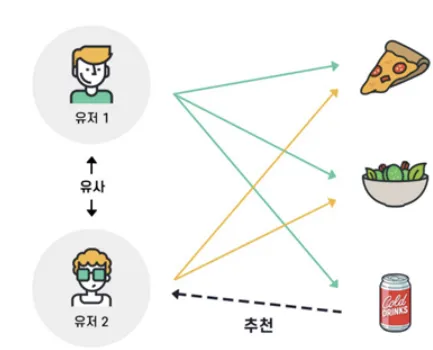    
특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 이 TOP-N 사용자가 좋아하는 아이템을 추천  
2. 아이템 기반  
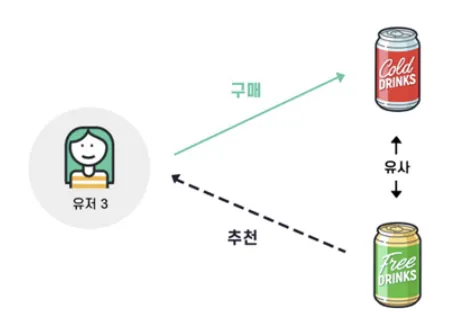  
추천하고자하는 target item과 유사한 아이템의 평점 활용  


|비교기준|User-based CF (UBCF)|Item-based CF (IBCF)|
|---|---|---|
|추천의 정확성|아이템 수가 사용자 수보다 많은 경우 적합|사용자 수가 아이템 수보다 많은 경우 적합|
|시스템 공간 및 효율성|아이템 수가 사용자 수보다 많은 경우 적합|사용자 수가 아이템 수보다 많은 경우 적합|
|안정성|아이템이 수시로 바뀌는 경우 적합|아이템 리스트의 변화가 적고 고정적인 경우 적합|
|다양성|특정 사용자가 독특한 아이템을 평가한 경우 독창적 아이템 추천 가능|유사한 아이템 위주로 추천되어 다양성 및 참신성 부족|


- 메모리 기반 협업 필터링의 한계  
-아이템/유저가 계속 늘어날 경우 확장성 떨어짐  
-주어진 평점/선호도 데이터가 적을 경우 성능 저하  

### 3-2)모델 기반 협업 필터링(잠재 요인 협업 필터링)  
- 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법  
- 메모리 기반 협업 필터링은 관측된 평점 정보만으로 유사도를 계산, 추천을 수행 -> **숨겨진 선호 요인이나 아이템의 특성을 반영하지 못함**, 유사도에 의존 -> 결측이 많은 환경이나 복잡한 상황에서 정확도가 떨어짐  

1. 잠재 요인  
- 사용자와 아이템 사이의 관계를 설명해주는 눈에 보이지 않는 숨겨진 특성  
- Latent Factor Model: 주어진 데이터로는 알 수 없는 사용자-아이템 간의 숨겨진 특성을 찾기 위해 주어진 Matrix를 **사용자-잠재요인** **아이템-잠재요인**으로 각각 분해하여 학습  
사용자와 아이템을 보이지 않는 축(=잠재적인 차원)들을 사용해 나타낼 수 있고, 이를 통해 평점을 예측할 수 있다고 가정  
- factor model  
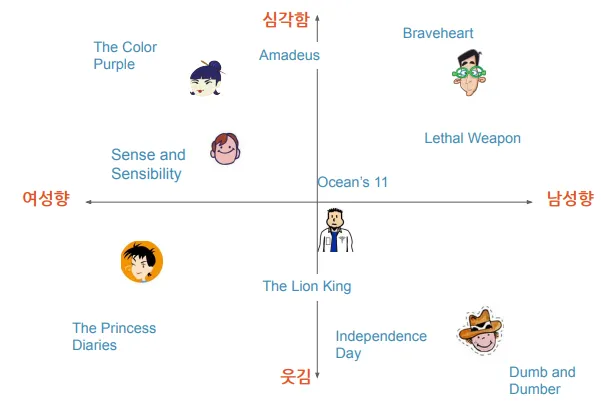  
- latent factor model  
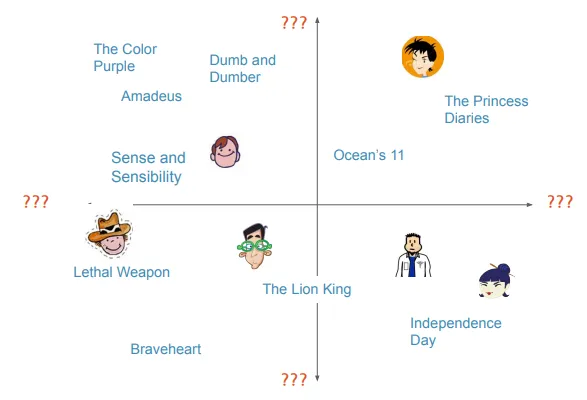  
성향을 파악하기 위해 각 유저와 아이템을 잠재 Factor를 표현하고, 이는 같은 공간에 맵핑이 가능하여 서로의 거리나 각도 등을 통해 유사도를 파악해 잠재적인 취향을 파악하는 것  

2. 행렬 분해  
- User-Item Matrix (유저-아이템 행렬)에는 유저의 취향+아이템의 특성이 존재 -> 이 행렬을 분해하여 평점을 유저의 잠재 요인과 아이템의 잠재요인의 내적으로 설명할 수 있다면, 평점 예측 가능   
$r_{ui} = q_ip_u^T = \sum^k_{s=1}u_{uk}*v_{ik}$  
- User u의 Item i에 대한 선호도(평점): User/Item Latent Matrix 벡터의 내적으로 표현 
- 수행 방식  
Orthgonality Factorization(Singular Vector Decomposition: SCD) 특이값 분해  
Stochastic Gradient Descent (SGD)  
Non-Negatice Matrix Factorization (NMF)  
Probabilistic Factorization (PMF)  

# **4)추천시스템 평가**  
1. 오프라인 평가(실시간 연동 O)   
- 사용자 행동 이력에서 얻은 과거의 로그 사용->모델의 예측 정밀도 등 평가   
- 예측 오차 지표: MSE MAE RMSE   
- 집합 평가 지표: precision, recall, F1-measure   
- 순위 평가 지표: PR곡선, Recall, Precision의 각 축으로 둘러싸인 면적이 pr곡선의 AUC, Ap, MRR mAP, nDCG   
2. 온라인 평가(실시간 연동X)   
- 추천 모델이나 새로운 사용자 인터페이스를 일부 사용자에게 실제 표시   
- A/B 테스트, 인터리빙   
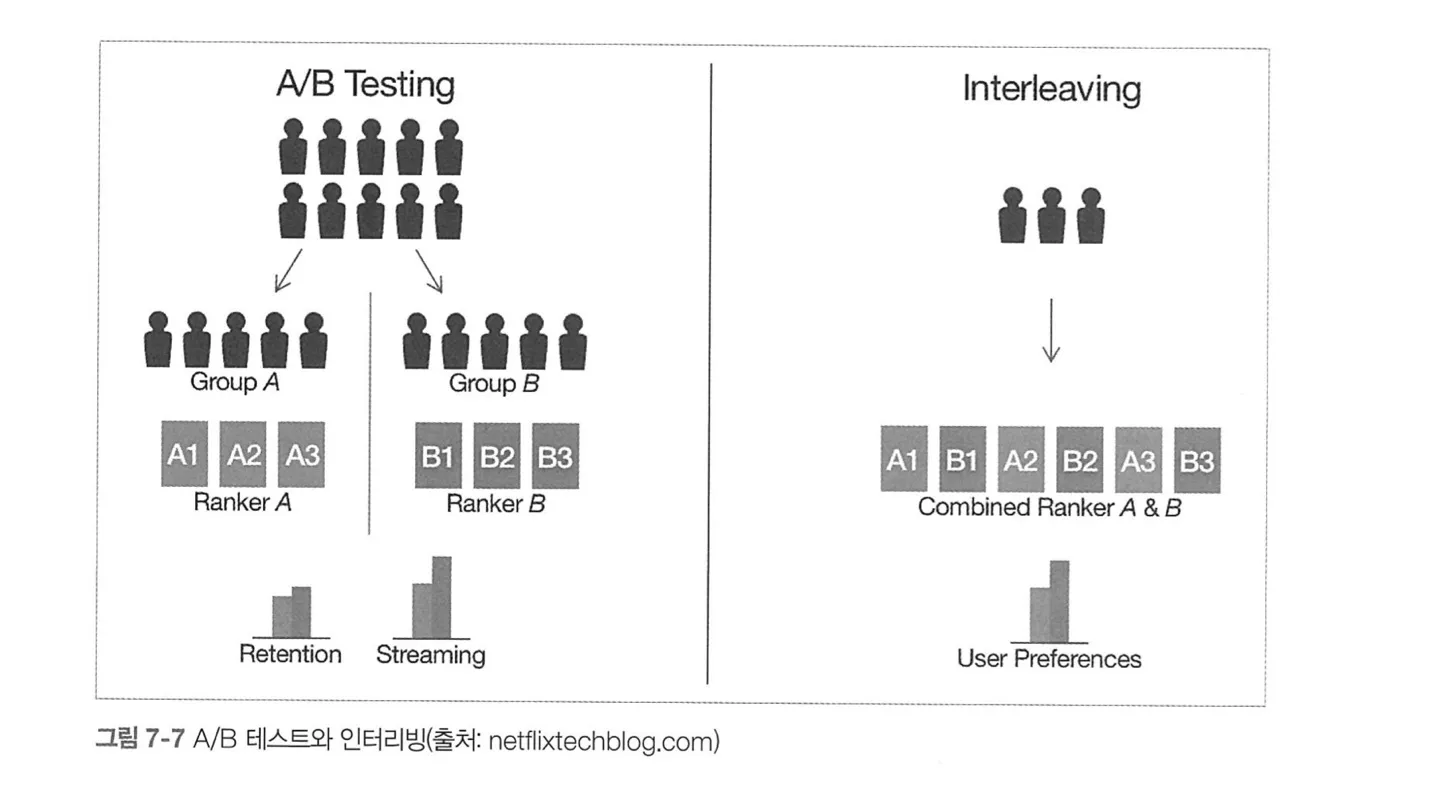  
3. 사용자 스터디   
- 사용자에게 직접 인터뷰나 설문을 통해 데이터 얻음   


# **연관 분석**  

# **1)연관분석**  
- 상품이나 서비스를 구매하는 등 일련의 거래나 사건 안에 존재하는 **항목 간의 일정한 연관 규칙을 발견하는 분석**  
- 비지도 학습에 해당  
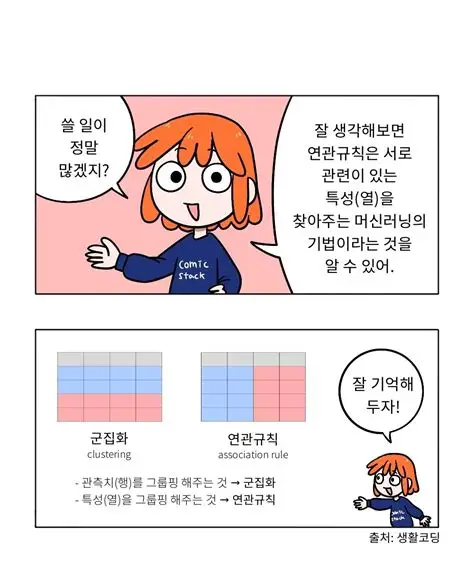  
- 'A를 구매하였을 때, B 또한 구매할 것이다'와 같이 **if-then** 의 형식, **A→B**로 표현  
  - 조건절(Antecedent): `만일 ~라면`에 해당하는 부분  
  - 결과절(Consequent): 그 뒷부분에 해당하는 내용  
  - 아이템 집합(Item set): 조건절 또는 결과절을 구성하는 아이템들의 집합  
- 실험 X, 관찰 데이터 -> **인과관계가 아님**  
- 연관 분석, 추천 시스템 비교  

|구분|상품기반 협업 필터링|연관분석|
|---|---|---|
|연산방식|상관관계 기반(같은 방향으로 증감하는 강도)|교집합 기반(장바구니에 같이 담겨있는 비율)|
|알고리즘 구조|상품마다 타 상품과 1:1 계산(특정상품의 구매데이터를 다른 상품의 구매데이터와 비교)|상품마다 주문내역을 1:n 계산(특정상품이 포함된 구매데이터에서 다른 상품의 비율 계산)|
|특징|사용자의 개인 선호도(평가점수, 구매횟수 등)에 따라 선호 상품 추출 가능|상품과 연관성이 높은 1개이상의 상품을 세트로 추출 가능|
|추천 방식|타 상품의 유사도 순위대로 노출|연관지표가 높은 세트상품(1개이상) 노출|

- 협업필터링은 개인화된 상품 추천에 자주 활용 / 연관 분석은 상품 노출 또는 세트상품 구성에 많이 활용  


# **2)주요 개념**  
### 2-1) 연관규칙의 조건  
1. **일정 이상의 지지도**: 두 품목(품목 A와 B)이 함께 구매한 경우의 수가 일정 수준 이상이어야 함  
- **지지도**: 전체 거래 항목 중 품목 A와 품목 B가 동시에 포함되는 거래 비율  
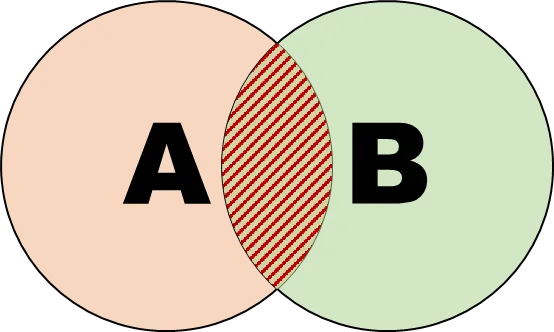  

2. **일정 이상의 신뢰도**: 품목 A를 포함하는 거래 중 품목 B를 구입하는 경우의 수가 일정 수준 이상이어야 함  
- **신뢰도**: 품목 A를 포함하는 거래 수 중 품목 A와 품목 B가 동시에 포함하는 거래 비율  
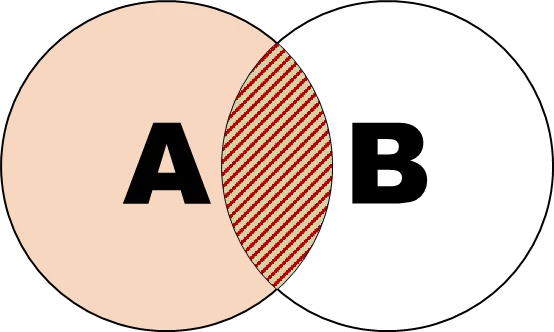  

### 2-2)연관 분석의 평가 척도  
- **향상도**: 품목 A가 주어지지 않았을 때의 품목 B의 확률 대비 품목 A가 주어졌을 때의 품목 B의 확률의 증가 비율  
$향상도 = \frac{P(A \cap B)}{P(A)P(B)} = \frac{신뢰도}{P(B)}$  
A와 B가 독립이라면    
$향상도 = \dfrac{P(A∩B)}{P(A)⋅P(B)} = \dfrac{P(A)⋅P(B)}{P(A)⋅P(B)}=1$  
- 우리가 **실제로 관측한 $P(A∩B)$**가 **A와 B가 함께 등장할 확률의 기댓값** $P(A)\cdot P(B)$**보다 크면 → 양의 연관성, 작으면 → 음의 연관성**

- 아이템 수가 n개일 때 총 규칙 수:  $3^n−(2^n+2^n-1)$  
- 예시) 라면 구매 시 햇반 구매 여부  
  $지지도=P(라면\cap 햇반)=\dfrac{3}{10}=0.3$  
  $신뢰도=P(햇반|라면) = \dfrac{3}{8} = 0.375$  
  $향상도=\dfrac{P(라면\cap 햇반)}{P(라면)\cdot P(햇반)}=\dfrac{0.3}{0.8*0.3}=1.25$  
  

# 3)활용사례(넷플릭스 투자)
- 근거: 
  1. 데이비드 핀쳐 감독의 영화는 시청 완료율이 높았음
  2. 영국판 <하우스 오브 카드>가 인기 있었음
  3. 영국판 <하우스 오브 카드>를 본 사람들은 케빈 스페이시가 출연한 영화나 데이비드 핀쳐 감독의 영화를 보았음  

- **지지도**: 영국판 <하우스 오브 카드> ∩ 케빈 스페이시 콘텐츠의 지지도가 높았음  
- **신뢰도**: P(끝까지 시청|데이비드 핀처의 콘텐츠 시청) 높 -> 핀처 콘텐츠를 본 사람들은 끝까지 시청하는 경향 있음  
- **향상도**: 영국판 <하우스 오브 카드> 시청, 케빈 스페이시 콘텐츠 시청 -> 향상도>1 -> 두 요소가 결합되면 사용자 반응이 좋을 것  

# **4)연관 분석 알고리즘**  
### 4-1)Apriori 알고리즘  
- 선험적 경험 이용  
- 상위 조합에서부터 차례로 스캔하면서 특정 조합이 자주 발생하지 않는다면 이의 결과물로 탄생한 후속 조합들까지 모두 후보에서 배제  
- 장점: 하나의 조합만 검사하고도 이에서 파생된 다른 조합들까지 후보에서 배제할 수 있으므로 시간과 연산량을 효과적으로 줄일 수 있음  
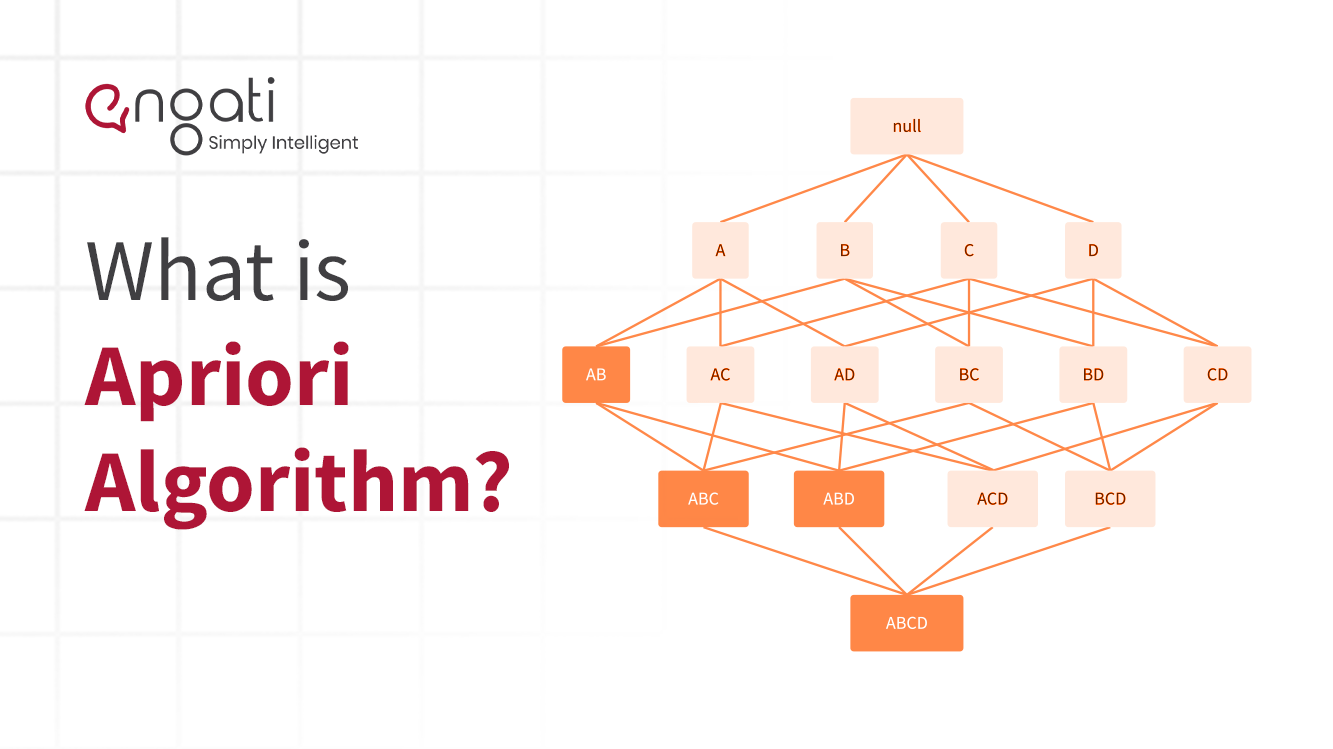  
1. 단일 항목 집합 생성  
-모든 개별 상품에 대해 지지도 계산  
-최소 지지도 넘는 항목만 다음 단계로  
2. 2개 항복 집합 생성  
-2개 항목의 조합 생성 -> 지지도 계산 -> 최소 지지도 못 넘으면 제거  
3. 더 큰 항목 집합 생성  
-3개 이상 항목 조합 생성 -> 지지도 계산 -> 최소 지지도 안 넘으면 제거  
4. 최종 반발 항목 집합 선정  
-마지막으로 남은 반발 항복 집합들을 바탕으로 연관 규칙 생성  
-각 규칙에 대해 지지도, 신뢰도, 향상도 계산 -> 가장 유용한 규칙 선택  

|장점|단점|
|---|---|
|수많은 상품 연관 구매 패턴 발견, 다른 연구가설 탐지 가능, 원리간단, 이해분석 용이|현실적 중요 연관 규칙 부족, 데이터가 커질수록 속도가 느려짐|

- 코드  
```python
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 최소 지지도를 설정하여 자주 함께 구매되는 상품 조합을 찾기
frequent_itemsets = apriori(df, min_support=0.06, use_colnames=True)

# 연관 규칙을 추출하고, 신뢰도 0.8 이상의 규칙만 추출
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# 향상도를 기준으로 내림차순 정렬하여 상위 규칙을 확인
top_rules = rules.sort_values(by='lift', ascending=False).head()
```  

### 4-2)FP Growth 알고리즘  
- FP-Tree 라는 구조를 이용 -> Apriori를 효과적으로 구현   
- ㅜTree, Array, Linked_List를 합쳐놓은 구조  
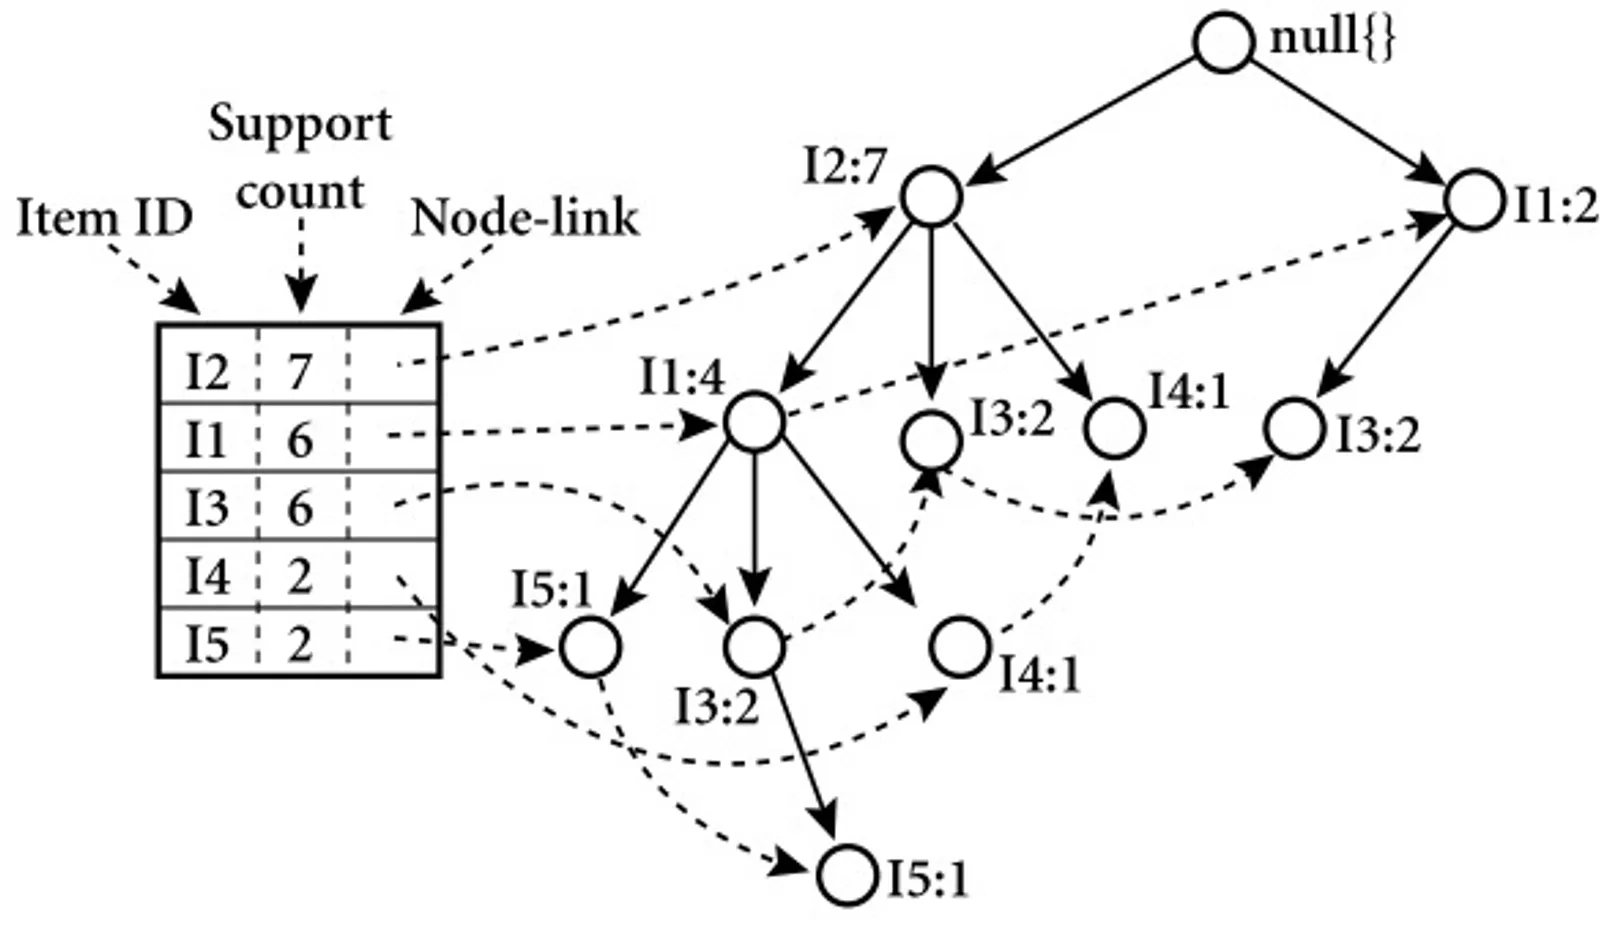  
- 모든 거래를 확인해 각 아이템마다 지지도를 계산하고 , 최소 지지도 이상의 아이템만 선택  
1. 빈발 항목 필터링  
-모든 항목의 빈도를 계산한 후, 최소 지지도 이상인 항목만을 남김  
2. 데이터 재정렬  
-남은 항목들을 각 거래별로 빈도순으로 재정렬, 거래 데이터에서 가장 자주 구매된 항목이 먼저 오도록 재정렬  
3. FP-트리 생성  
-재정렬된 데이터를 바탕으로 FP-트리를 생성, 각 거래를 노드로 표현, 동일한 항목은 기존 노드에 연결해 빈도를 증가시키고, 새로운 항목은 새로운 노드로 추가  
4. 빈발 항목 집합 추출  
-FP-트리를 바탕으로 특정 항목을 기준으로 부분 트리를 만들어 빈발 항목 집합을 추출  
5. 연관 규칙 도출  
-FP-트리에서 도출된 빈발 항목 집합을 바탕으로 연관 규칙을 만들기  
-각 규칙에 대해 지지도(Support), 신뢰도(Confidence), 향상도(Lift) 등의 지표를 계산해 가장 유용한 규칙을 선택  

|장점|단점|
|---|---|
|데이터 2번만 스캔하는 트리 구조->빠름|대용량 데이터셋에서 메모리 효율적으로 사용 X, 설계 어려움, 지지도의 계산은 무조건 FP-Tree가 만들어져야 가능|

- 코드  
```python
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

# 최소 지지도를 0.06으로 설정하여 빈발 항목 집합을 찾기
frequent_itemsets = fpgrowth(df, min_support=0.06, use_colnames=True)

# 연관 규칙을 추출하고, 신뢰도 0.8 이상의 규칙만 추출
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)
```